In [3]:
# https://www.kaggle.com/code/priyang/health-insurance-cost-prediction-using-ml/notebook?scriptVersionId=78467794

In [2]:
import pandas as pd


In [4]:
data=pd.read_csv("../notebooks/insurance.csv")

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [15]:
data.shape


(1338, 7)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [22]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [29]:
data['sex'].unique()

array([0, 1], dtype=int64)

In [28]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [32]:
data["region"].unique()

array([1, 2, 3, 4], dtype=int64)

In [31]:
data['region']=data['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

In [33]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [35]:
data["smoker"]=data["smoker"].map({"yes":1,"no":0})

In [36]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [37]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [39]:
X=data.drop(['charges'],axis=1)

In [40]:
y=data['charges']

In [43]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [58]:
lr=LinearRegression()

In [59]:
 lr.fit(X_train,y_train)

LinearRegression()

In [68]:
 svm=SVR()
svm.fit(X_train,y_train)

SVR()

In [70]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [71]:
gr=GradientBoostingRegressor()

In [72]:
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [73]:
y_pred1=lr.predict(X_test)

In [76]:
y_pred2=svm.predict(X_test)

In [78]:
y_pred3=rf.predict(X_test)

In [79]:
y_pred4=gr.predict(X_test)

In [80]:
df1=pd.DataFrame({"Actual":y_test,"lr":y_pred1,"svm":y_pred2,"rf":y_pred3,"gr":y_pred4})

In [82]:
df1

,Actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,10495.239691,11001.128629
887,5272.17580,7116.295018,9492.515425,5395.018511,5840.174656
890,29330.98315,36909.013521,9648.758701,28076.302606,28001.980112
1293,9301.89355,9507.874691,9555.044136,9783.737436,9745.291602
259,33750.29180,27013.350008,9420.421978,34431.178146,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47599.112177,45431.423211
575,12222.89830,11814.555568,9625.431547,12135.668903,12465.025294
535,6067.12675,7638.107736,9504.168517,6411.393924,6974.336525
543,63770.42801,40959.081722,9605.004594,46812.999863,47862.047791


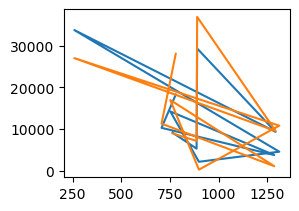

In [97]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')

plt.plot(df1['lr'].iloc[0:11],label="lr")

In [98]:
from sklearn import metrics

In [101]:
score1= metrics.r2_score(y_test,y_pred1)
print (score1)

0.7833463107364538


In [104]:
score2=metrics.r2_score(y_test,y_pred2)
print (score2)

-0.07229762787861826


In [106]:
score3=metrics.r2_score(y_test,y_pred3)

In [107]:
print(score3)

0.8664819401363674


In [109]:
score4= metrics.r2_score(y_test,y_pred4)
print(score4)

0.8779726251291786


In [110]:
print(score1,score2,score3,score4)

0.7833463107364538 -0.07229762787861826 0.8664819401363674 0.8779726251291786


In [112]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [113]:
print(s1,s2,s3,s4)

4186.5088983664355 8592.428727899724 2466.614180472358 2447.951558054584


In [114]:
data={"age":40,"sex":1,"bmi":40.30,"children":4,"smoker":1,"region":2}

In [116]:
df=pd.DataFrame(data,index=[0])

In [117]:
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [118]:
new_pred=gr.predict(df)

In [120]:
print(new_pred[0])

43013.23345490827


In [121]:
gr=GradientBoostingRegressor()

In [122]:
gr.fit(X,y)

GradientBoostingRegressor()

In [123]:
new_pred=gr.predict(df)

In [124]:
print(new_pred)

[42148.361888]
